# Implementation of MCP Neuron for AND and OR Function.

In [5]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  # Perform element-wise addition and store in a new list
  element_wise_sum = [x1 + x2 for x1, x2 in zip(X1, X2)]

  # Create a new list to store neuron states
  state_neuron = []

  # Append 1 if sum is above threshold, otherwise append 0
  for element_sum in element_wise_sum:
    if element_sum >= T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)
  return state_neuron

In [6]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [7]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.

    element_wise_sum = [x1 + x2 for x1, x2 in zip(X1, X2)]

    state_neuron = []

    for element_sum in element_wise_sum:
        if element_sum >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)




    return state_neuron


In [8]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


• Question - 1: List out all the limitations of MCP - Neurons.



1. Unable to Learn
MCP neurons have fixed weights and thresholds and cannot learn from data or learn from experience and update weights.
They require hand tuning of weights and are therefore not practical for real-world applications.
2. Only Linearly Separable Problems
MCP neurons only work for linearly separable problems (like AND, OR gates).
They are unable to solve non-linearly separable problems (e.g., XOR problem), and this necessitated the creation of more sophisticated models like Perceptrons and Multi-Layer Neural Networks.
3. Binary Output Limitation
The model uses a step activation function, i.e., the output is 0 or 1.
It is not able to handle continuous values, and this limits its applicability in real-world problems that include probability estimation.
4. No Support for Multi-Layer Networks
MCP neurons are single-layered and cannot be used to develop deep networks.
They lack the feature extraction ability for intricate hierarchical features, different from modern deep learning algorithms.
5. No Weight Adjustment Concept (Gradient Descent)
There is no backpropagation or use of gradient descent to update weights in MCP.
This diminishes its ability to learn and generalize from training data.
6. No Time Dependence (No Memory)
The model is not concerned with temporal dependencies and thus not suitable for sequential data (e.g., speech, time-series prediction).
It lacks memory process as in Recurrent Neural Networks (RNNs).

• Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.
{Can you devise a if else rules.}

We can't because method is not linearly separable. But we can build logic with if else. Here logic consiste of

In [21]:
def mcp_xor(x1, x2):
    if (x1 == 1 and x2 == 0) or (x1 == 0 and x2 == 1):
        return 1  # XOR condition satisfied
    else:
        return 0  # Otherwise, return 0

# Test cases
print(mcp_xor(0, 0))  # Output: 0
print(mcp_xor(0, 1))  # Output: 1
print(mcp_xor(1, 0))  # Output: 1
print(mcp_xor(1, 1))  # Output: 0

0
1
1
0


Here the output is correctly calculating the output for logical XOR gate.

# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
dataset_1 = pd.read_csv("/content/drive/MyDrive/AI ML/Week 3/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = dataset_1.drop(columns=["label"]).values  # 784 pixels
y = dataset_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


What does the shape of X represent?

Shape of X during row represent the single image of total 784 and for columns it represent single pixel location for all images

### Viewing the Dataset.

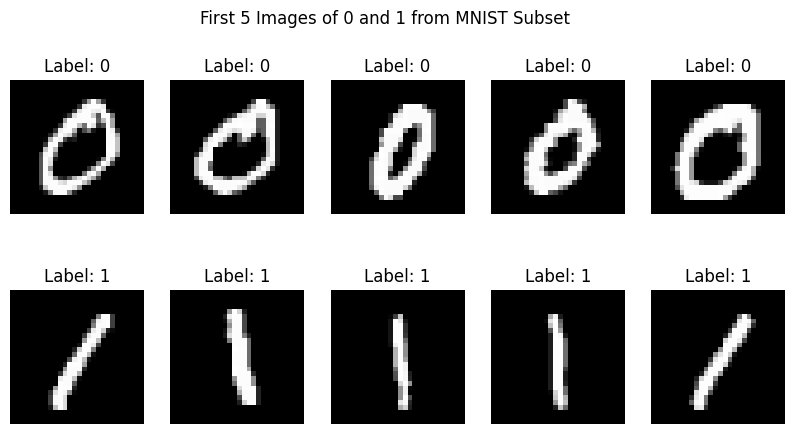

In [12]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [22]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

What does the weights array represent in this context?

The array of weights is the priority of every pixel in determining whether the image is a "0" or a "1."

Since we have 784 pixels in each image, we start 784 weights, one for each pixel.
These weights will be optimized in training to minimize classification mistakes.
The learned final weights will dictate the extent of each pixel's impact on the decision boundary for image classification.

Why are we initializing the weights to zero? What effect could this
have on the training process?

Zero initialization of weights is a simple technique, setting all weights at the same initial point. The argument is:

It gives gradient descent a fair start.
It doesn't bias towards any pixel in the beginning.
It isn't suitable for general models like logistic regression. But it causes trouble in neural networks:

Symmetry Problem

If all the weights start at 0, all the neurons of a layer get updated equally in backpropagation.
This prevents the network from learning varied and informative features and makes all the neurons redundant.

Slow Convergence

If all the weights are 0, all the gradients are the same, which means slow updates.
The model can fail to learn the best weights efficiently.

## Step - 3 - Make a Decision function:

In [15]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    #####Your Code Here############  # Activation function (step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [17]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    for epoch in range(epochs):
        for i in range(len(X)):
          prediction = decision_function(X[i], weights, bias)
          if y[i] - prediction != 0:
            weights += learning_rate * (y[i] - prediction) * X[i]
            bias += learning_rate * (y[i] - prediction)

    # Step 4: Calculate accuracy
    y_pred_all = decision_function(X, weights, bias)
    accuracy = np.mean(y_pred_all == y)

    return weights, bias, accuracy

What is the purpose of the output = np.dot(X[i], weights) + bias line?



This establishes the raw activation value before using the step function (decision function).
The output is finally passed on through a threshold function (say, step function) to obtain a binary prediction (0 or 1).


  What happens when the prediction is wrong? How are the weights and
bias updated?


If the prediction is incorrect, the Perceptron Learning Rule updates the weights and bias to reduce future errors.

When error we utilize the condition,
if y[i] - prediction!= 0:
        weights += learning_rate * (y[i] - prediction) * X[i]
        bias += learning_rate * (y[i] - prediction)

If the prediction is too low (0 instead of 1), the update increases weights for relevant pixels.

If the prediction is too high (1 instead of 0), the update decreases weights for relevant pixels.

This continues until the model classifies most samples correctly or reaches max epochs.

Why is the final accuracy important, and what do you expect it to be?

It is an estimate of how well the model has learned to accurately classify images.
High accuracy suggests that the model can generalize well to novel, unseen data.

Low accuracy suggests:
The model isn't learning (possibly because the data or the learning rate is bad).
The data are linearly inseparable (say, XOR), and a Perceptron cannot handle it.
Expected Accuracy for MNIST (0 vs. 1 Classification)

Since the numbers 0 and 1 are linearly separable, the Perceptron will come close to achieving 100% accuracy if properly trained.


## Training the Perceptron

In [18]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  1.0


## Step 5: Visualize Misclassified Images

In [20]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


What does misclassified idx store, and how is it used in this code?


The line:
```python
misclassified_idx = np.where(y_pred!= y)[0]
```
np.where(y_pred!= y)

finds indices where predicted labels (y_pred) are not equal to the actual labels (y).
misclassified_idx holds an array of indices of the misclassified images

If there are misclassified images, the code selects up to 10 misclassified images with:

for ax, idx in zip(axes.flat, misclassified_idx[:10]):

X[idx] extracts the misclassified image from the dataset.

.reshape(28, 28)

re-shapes the flattened 784-pixel vector into a 28x28 grayscale image.

The image is displayed with its predicted vs. true label using Matplotlib.
If no images were misclassified, the code prints:
"All images were correctly classified!"

How do you interpret the result if the output is ”All images were
correctly classified!”?



The perceptron learned to classify all 1s and 0s in the data correctly.
This is to be expected as digits 0 and 1 are linearly separable, and hence can be discriminated by a single-layer perceptron very easily.

Possible Overfitting

If this happens on training data, it's a good thing (the model learned perfectly).
But if this happens on test data, it may indicate overfitting, meaning the model memorized the training set rather than generalizing well.